In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)


In [ ]:
main_config = {
    "hovermode": "x unified",
    "legend": {"yanchor":"top", 
                "y":0.9, 
                "xanchor":"left",
                "x":0.1,
                "title": {"text": None},
                "font" :{"color":"white"},
                "bgcolor": "rgba(0,0,0,0.5)"},
    "margin": {"l":0, "r":0, "t":20, "b":0}
}

In [ ]:
# Lendo os dados
B_Dados = pd.read_csv('dengue_campinas.csv')

In [ ]:
# Verificando
B_Dados

,data,dia,mês,ano,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
0,1998-01-01,1,1,1998,237,179.2,25.7,20.2,28.1
1,1998-02-01,1,2,1998,331,226.3,25.1,20.0,28.0
2,1998-03-01,1,3,1998,562,149.1,24.8,22.4,27.2
3,1998-04-01,1,4,1998,187,46.4,22.7,18.1,26.0
4,1998-05-01,1,5,1998,32,88.3,19.2,15.7,22.9
...,...,...,...,...,...,...,...,...,...
199,2014-08-01,1,8,2014,55,12.2,20.6,13.1,24.7
200,2014-09-01,1,9,2014,40,69.2,23.0,18.6,26.8
201,2014-10-01,1,10,2014,40,15.6,24.7,17.2,30.0
202,2014-11-01,1,11,2014,57,154.8,25.0,22.1,28.3


In [ ]:
B_Dados.loc[ B_Dados['mês'] == 'Jan', 'mês'] = 1
B_Dados.loc[ B_Dados['mês'] == 'Fev', 'mês'] = 2
B_Dados.loc[ B_Dados['mês'] == 'Mar', 'mês'] = 3
B_Dados.loc[ B_Dados['mês'] == 'Abr', 'mês'] = 4
B_Dados.loc[ B_Dados['mês'] == 'Mai', 'mês'] = 5
B_Dados.loc[ B_Dados['mês'] == 'Jun', 'mês'] = 6
B_Dados.loc[ B_Dados['mês'] == 'Jul', 'mês'] = 7
B_Dados.loc[ B_Dados['mês'] == 'Ago', 'mês'] = 8
B_Dados.loc[ B_Dados['mês'] == 'Set', 'mês'] = 9
B_Dados.loc[ B_Dados['mês'] == 'Out', 'mês'] = 10
B_Dados.loc[ B_Dados['mês'] == 'Nov', 'mês'] = 11
B_Dados.loc[ B_Dados['mês'] == 'Dez', 'mês'] = 12

In [ ]:
B_Dados['casos-confirmados'] = B_Dados['casos-confirmados'].astype(int)
B_Dados['dia'] = B_Dados['dia'].astype(int)
B_Dados['mês'] = B_Dados['mês'].astype(int)

# B_Dados['temperatura-mininima'] = B_Dados['temperatura-mininima'].str.lstrip('R$ ')
B_Dados['temperatura-mininima'] = B_Dados['temperatura-mininima'].astype(int)

In [ ]:
# B_Dados.loc[B_Dados['Status de Pagamento'] == 'Pago', 'Status de Pagamento'] = 1
# B_Dados.loc[B_Dados['Status de Pagamento'] == 'Não pago', 'Status de Pagamento'] = 0

In [ ]:
B_Dados['temperatura-mininima'] = B_Dados['temperatura-mininima'].astype(int)

#### Casos por chuva

In [ ]:
B1_Dados = B_Dados.groupby('casos-confirmados')['chuva'].sum().reset_index()

In [ ]:
B1_Dados

,casos-confirmados,chuva
0,0,1204.2
1,1,201.9
2,2,1017.6
3,3,1252.3
4,4,325.2
...,...,...
95,3213,192.1
96,4207,97.0
97,7555,98.6
98,10484,22.9


In [ ]:
fig1 = go.Figure(go.Bar(
        x=B1_Dados['chuva'],
        y=B1_Dados['casos-confirmados'],
        orientation='h',
        textposition='auto',
        text=B1_Dados['chuva'],
        insidetextfont=dict(family='Times', size=12)))

In [ ]:
fig1.show()

#### casos confirmados com médias por ano

In [ ]:
B2_Dados = B_Dados.groupby('ano')['casos-confirmados'].sum().reset_index()

In [ ]:
fig2 = go.Figure(go.Scatter(
    x=B2_Dados['ano'], y=B2_Dados['casos-confirmados'], mode='lines', fill='tonexty'))

In [ ]:
fig2.add_annotation(text='Casos Confirmados por Médias por dia do Mês',
        xref="paper", yref="paper",
        font=dict(
            size=20,
            color='gray'
            ),
        align="center", bgcolor="rgba(0,0,0,0.8)",
        x=0.05, y=0.85, showarrow=False)
fig2.add_annotation(text=f"Média : {round(df2['casos-confirmados'].mean(), 2)}",
        xref="paper", yref="paper",
        font=dict(
            size=30,
            color='gray'
            ),
        align="center", bgcolor="rgba(0,0,0,0.8)",
        x=0.05, y=0.55, showarrow=False)

#### Casos confirmados médias por mês

In [ ]:
B3_Dados = B_Dados.groupby('mês')['casos-confirmados'].sum().reset_index()

In [ ]:
B3_Dados

,mês,casos-confirmados
0,1,1433
1,2,4620
2,3,15626
3,4,31102
4,5,16247
5,6,2421
6,7,366
7,8,190
8,9,170
9,10,197


In [ ]:
fig4 = go.Figure(go.Scatter(
    x=B3_Dados['mês'], y=B3_Dados['casos-confirmados'], mode='lines', fill='tonexty'))

In [ ]:
fig4.add_annotation(text='Casos Confirmados por Médias por Mês',
        xref="paper", yref="paper",
        font=dict(
            size=20,
            color='gray'
            ),
        align="center", bgcolor="rgba(0,0,0,0.8)",
        x=0.05, y=0.85, showarrow=False)
fig4.add_annotation(text=f"Média : {round(df4['casos-confirmados'].mean(), 2)}",
        xref="paper", yref="paper",
        font=dict(
            size=30,
            color='gray'
            ),
        align="center", bgcolor="rgba(0,0,0,0.8)",
        x=0.05, y=0.55, showarrow=False)

#### Casos confirmados no mes com chuva

In [ ]:
B4_Dados = B_Dados.groupby(['casos-confirmados', 'mês'])['chuva'].sum().reset_index()

In [ ]:
fig3 = px.line(B4_Dados, y="chuva", x="mês", color="casos-confirmados")
fig3.show()

#### Temperatura em PieChart // talvez botar no msm card

In [ ]:
B5_Dados = B_Dados.groupby('temperatura-media')['chuva'].sum().reset_index()

In [ ]:
fig11 = go.Figure()
fig11.add_trace(go.Pie(labels=B5_Dados['temperatura-media'], values=B5_Dados['chuva'], hole=.7))

#### Casos por Mês + segregação por chuva

In [ ]:
B_Dados.columns

Index(['data', 'dia', 'mês', 'ano', 'casos-confirmados', 'chuva',
       'temperatura-media', 'temperatura-mininima', 'temperatura-maxima'],
      dtype='object')

In [ ]:
B6_Dados = B_Dados.groupby(['mês', 'casos-confirmados'])['chuva'].sum().reset_index()
B6_Dados_group = B_Dados.groupby('mês')['chuva'].sum().reset_index()

In [ ]:
fig5 = px.line(B6_Dados, y="chuva", x="mês", color="casos-confirmados")
fig5.add_trace(go.Scatter(y=B6_Dados_group["chuva"], x=B6_Dados_group["mês"], mode='lines+markers', fill='tonexty', fillcolor='rgba(255, 0, 0, 0.2)', name='Total de Casos'))
fig5.show()

#### Temperatura minima e maxima

In [ ]:
B7_Dados = B_Dados.groupby('temperatura-mininima')['temperatura-maxima'].sum()

In [ ]:
fig6 = go.Figure()
fig6.add_trace(go.Pie(labels=['temperatura-maxima', 'temperatura-mininima'], values=B7_Dados, hole=.6))
fig6.show()

## INDICATORS

#### Indicators - Casos confirmados, chuva e temperatura media

In [ ]:
B8_Dados = B_Dados.groupby(['casos-confirmados', 'chuva'])['temperatura-media'].sum()

In [ ]:
B8_Dados.sort_values(ascending=False, inplace=True)

In [ ]:
B8_Dados = B8_Dados.reset_index()

In [ ]:
B8_Dados

,casos-confirmados,chuva,temperatura-media
0,1660,14.1,27.2
1,262,181.4,26.5
2,4,45.2,26.3
3,25,133.3,25.9
4,91,215.3,25.9
...,...,...,...
191,36,60.6,17.7
192,2,80.3,17.5
193,4,83.0,17.3
194,133,59.8,16.4


In [ ]:
fig7 = go.Figure()
fig7.add_trace(go.Indicator(mode='number+delta',
        title = {"text": f"<span style='font-size:150%'>{B8_Dados['casos-confirmados'].iloc[0]} - Casos Confirmados</span><br><span style='font-size:70%'>Em Casos - em relação a média</span><br>"},
        value = B8_Dados['temperatura-media'].iloc[0],
        number = {'prefix': "Total "},
        delta = {'relative': True, 'valueformat': '.1%', 'reference': B8_Dados['temperatura-media'].mean()}
))

##### Nesses cards de indicador, mostrar abaixo os valores dos top 5 - Casos, chuvas

[texto do link](https://)#### Indicators - Casos confirmados periodo de chuva

In [ ]:
B9_Dados = B_Dados.groupby('casos-confirmados')['chuva'].sum()

In [ ]:
B9_Dados.sort_values(ascending=False, inplace=True)

In [ ]:
B9_Dados = B9_Dados.reset_index()

In [ ]:
fig8 = go.Figure()
fig8.add_trace(go.Indicator(mode='number+delta',
        title = {"text": f"<span style='font-size:150%'>{B9_Dados['casos-confirmados'].iloc[0]} - Casos época de chuva</span><br><span style='font-size:70%'>Casos com chuva- em relação a média</span><br>"},
        value = B9_Dados['chuva'].iloc[0],
        number = {'prefix': "Total "},
        delta = {'relative': True, 'valueformat': '.1%', 'reference': B9_Dados['chuva'].mean()}
))

#### Indicators - Casos confirmados

In [ ]:
fig9 = go.Figure()
fig9.add_trace(go.Indicator(mode='number',
        title = {"text": f"<span style='font-size:150%'>Casos Confirmados</span><br><span style='font-size:70%'>no periodo</span><br>"},
        value = B_Dados['casos-confirmados'].sum(),
        number = {'prefix': "Total "}
))

#### Indicators - Total de chuva

In [ ]:
B_Dados.shape

(204, 9)

In [ ]:
# Estatiticas
B_Dados.describe()

,dia,mês,ano,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
count,204.0,204.000000,204.000000,204.000000,196.000000,204.000000,204.000000,204.000000
mean,1.0,6.500000,2006.000000,357.539216,116.650000,22.200980,17.250000,25.565196
std,0.0,3.460545,4.911031,1741.814759,96.631613,2.399363,3.324969,2.249864
min,1.0,1.000000,1998.000000,0.000000,0.800000,16.400000,8.000000,19.100000
25%,1.0,3.750000,2002.000000,6.000000,43.850000,20.100000,15.000000,23.800000
50%,1.0,6.500000,2006.000000,17.500000,86.650000,22.700000,18.000000,26.200000
75%,1.0,9.250000,2010.000000,84.500000,177.925000,24.225000,20.000000,27.200000
max,1.0,12.000000,2014.000000,20428.000000,452.800000,27.200000,23.000000,30.100000


In [ ]:
# Módulo 1 - Medidas de tendência central
# Media aritmética desta coluna petal_length
B_Dados['temperatura-media'].mean()

22.20098039215686

In [ ]:
# Moda a que tem as maiores frequencia retornando duas moda
B_Dados['temperatura-media'].mode()

0    24.7
Name: temperatura-media, dtype: float64

In [ ]:
# Mediana é que ocupa o valor central de nossos dados
B_Dados['casos-confirmados'].median()

17.5

In [ ]:
# Módulo 2 - Mediads Separatrizes - fazem a divisão de nosso conjunto de dados
B_Dados['casos-confirmados'].describe()

count      204.000000
mean       357.539216
std       1741.814759
min          0.000000
25%          6.000000
50%         17.500000
75%         84.500000
max      20428.000000
Name: casos-confirmados, dtype: float64

<Axes: >

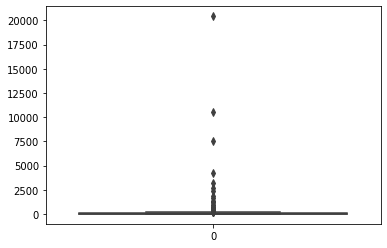

In [ ]:
#       25%        50%        75%        max
# 4.3 <----> 5.1 <----> 5.8 <----> 6.4 <-----> 7.9
# 1ºquartil= Q1=25% 
# 2ºquartil= Q2=Md = 50%
# 3ºquartil= Q3 = 75%
# vamos utilizar o grafico do boxplot para melhor visualização
sns.boxplot( B_Dados['casos-confirmados'] )     

In [ ]:
# Módulo 3 - Medidas de dispersão - medidas de tendência central 
# Amplitude Total
B_Dados['casos-confirmados'].max() - B_Dados['casos-confirmados'].min()

20428

In [ ]:
# Amplitude Interquartilica
B_Dados['casos-confirmados'].describe()

count      204.000000
mean       357.539216
std       1741.814759
min          0.000000
25%          6.000000
50%         17.500000
75%         84.500000
max      20428.000000
Name: casos-confirmados, dtype: float64

In [ ]:
B_Dados['casos-confirmados'].describe()[6:7]

75%    84.5
Name: casos-confirmados, dtype: float64

In [ ]:
B_Dados['casos-confirmados'].describe()[6:7].values

array([84.5])

In [ ]:
B_Dados['casos-confirmados'].describe()[6:7].values - B_Dados['casos-confirmados'].describe()[4:5].values

array([78.5])

In [ ]:
# Amplitude semi-interquartilica é anterior dividido por 2
(B_Dados['casos-confirmados'].describe()[6:7].values - B_Dados['casos-confirmados'].describe()[4:5].values) / 2

array([39.25])

In [ ]:
# Variância
B_Dados['casos-confirmados'].var()

3033918.6536269668

In [ ]:
# Desvio padrão
B_Dados['casos-confirmados'].std()

1741.8147587005246

In [ ]:
# Modulo 3 Medidas de dispersão
#Amplitude total
B_Dados['casos-confirmados'].max() - B_Dados['casos-confirmados'].min()

20428

In [ ]:
#Amplitude Interquartilica  é a diferença entre o terceiro e o primeiro quartil
B_Dados['casos-confirmados'].describe()[6:7].values - B_Dados['casos-confirmados'].describe()[4:5].values

array([78.5])

In [ ]:
#Amplitude semi-interquartilica é a média aritmética da diferença entre a mediana e os quartis

(B_Dados['casos-confirmados'].describe()[6:7].values - B_Dados['casos-confirmados'].describe()[4:5].values) / 2

array([39.25])

In [ ]:
# Variância uma medida de dispersão que mostra quão distates os valores estão da média
B_Dados['casos-confirmados'].var()

3033918.6536269668

In [ ]:
#Desvio padrão é simplesmente o resultado positivo da raiz quadrada da variância
B_Dados['casos-confirmados'].std() # praticamente raiz quadrada variançia

1741.8147587005246

In [ ]:
#Medidas de Assimetria é distribuição deos dados
# Simpetrica se média = mediana = moda ou As = 0
# Assimpetrica negativa se média < e igual mediana < e igual média ou As > 0
# Assimétrica positiva se moda < igual mediana < e igual média ou As > 0
B_Dados['casos-confirmados'].skew()

9.03707086272286

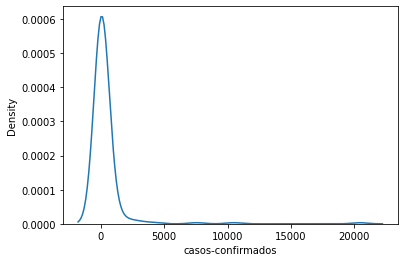

In [ ]:
sns.kdeplot(B_Dados['casos-confirmados']);

In [ ]:
#Medidas de Curtose é o grau de achatamento da distribuição 
#Leptocúrtica: qdo a distrib.apresenta uma cruva mais longo de frequencia bastante fechada, com os dados fortemente concentrados em torno de seu centro, k<0,263
#Mesocúrtica:quando os dados estão razoavelmente concentrados em torno de seu centro, K=0,263
#Platicúrtica: quando a distribuição apresenta uma curva de frequência mais aberta, com os dados fracamente concentrados em torno de seu centro, K>0,163
B_Dados['casos-confirmados'].kurtosis()

93.86728624693062

In [ ]:
#Modulo 4 - Correlação
# correlação de Pearson
#o coeficiente pode ter um intervalo de valores de +1 a -1 um valor de 0 indica que não fá associação entre as duas variáveis. um valor maior qu e 0 indica uma associação positiva
B_Dados.corr()

,dia,mês,ano,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
dia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mês,NaN,1.000000e+00,5.719432e-15,-0.148918,-0.165052,-0.104893,-0.174461,0.063113
ano,NaN,5.719432e-15,1.000000e+00,0.234546,-0.052393,-0.015468,-0.067878,0.021578
casos-confirmados,NaN,-1.489177e-01,2.345458e-01,1.000000,-0.083691,0.041172,0.042583,0.026151
chuva,NaN,-1.650516e-01,-5.239324e-02,-0.083691,1.000000,0.492732,0.479230,0.393733
temperatura-media,NaN,-1.048928e-01,-1.546810e-02,0.041172,0.492732,1.000000,0.882343,0.893091
temperatura-mininima,NaN,-1.744615e-01,-6.787756e-02,0.042583,0.479230,0.882343,1.000000,0.685752
temperatura-maxima,NaN,6.311262e-02,2.157846e-02,0.026151,0.393733,0.893091,0.685752,1.000000


<Axes: >

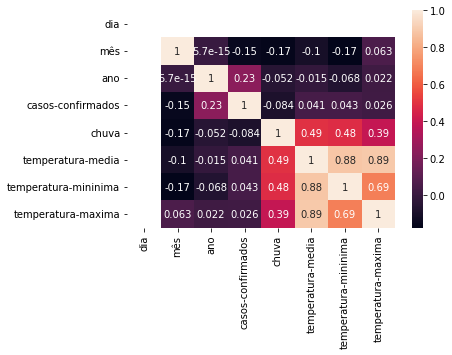

In [ ]:
sns.heatmap( B_Dados.corr(), annot=True )

<Axes: xlabel='chuva', ylabel='casos-confirmados'>

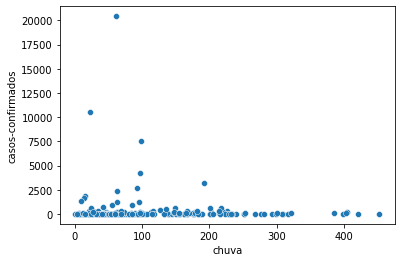

In [ ]:
sns.scatterplot( data=B_Dados, x='chuva', y='casos-confirmados')

In [ ]:
#Correlação de Spearman 
#uma vez que a correlação de Spearman segue uma lógica monotética, enão tem pressuposto lineares como na correlação de Pearson, é possivel utilizar o rs para relações não lineares
B_Dados.corr('spearman')

,dia,mês,ano,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
dia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mês,NaN,1.000000,0.000000,-0.527877,-0.116426,-0.136286,-0.192133,0.070140
ano,NaN,0.000000,1.000000,0.420995,-0.036976,-0.017844,-0.074314,0.043399
casos-confirmados,NaN,-0.527877,0.420995,1.000000,0.042668,0.197770,0.215053,0.057121
chuva,NaN,-0.116426,-0.036976,0.042668,1.000000,0.552947,0.539429,0.427294
temperatura-media,NaN,-0.136286,-0.017844,0.197770,0.552947,1.000000,0.892314,0.856656
temperatura-mininima,NaN,-0.192133,-0.074314,0.215053,0.539429,0.892314,1.000000,0.680475
temperatura-maxima,NaN,0.070140,0.043399,0.057121,0.427294,0.856656,0.680475,1.000000


<Axes: xlabel='temperatura-mininima', ylabel='temperatura-maxima'>

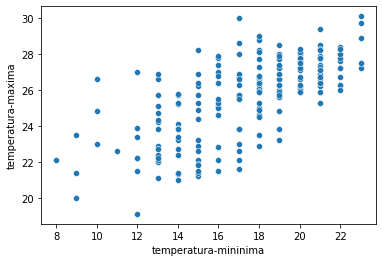

In [ ]:
sns.scatterplot( data=B_Dados, x='temperatura-mininima', y='temperatura-maxima')

In [ ]:
# Nulos
B_Dados.isnull().sum()

data                    0
dia                     0
mês                     0
ano                     0
casos-confirmados       0
chuva                   8
temperatura-media       0
temperatura-mininima    0
temperatura-maxima      0
dtype: int64

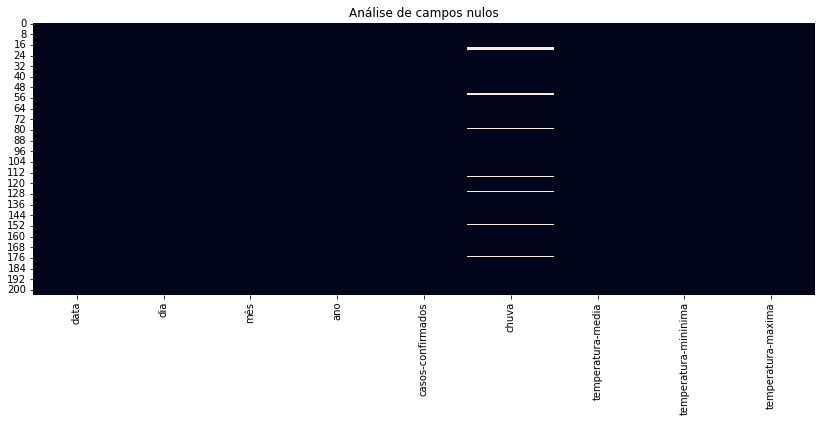

In [ ]:
# Nulos Plot
plt.figure( figsize=(14,5) )
plt.title('Análise de campos nulos')
sns.heatmap( B_Dados.isnull(), cbar=False );

In [ ]:
B_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   data                  204 non-null    object 
 1   dia                   204 non-null    int64  
 2   mês                   204 non-null    int64  
 3   ano                   204 non-null    int64  
 4   casos-confirmados     204 non-null    int64  
 5   chuva                 196 non-null    float64
 6   temperatura-media     204 non-null    float64
 7   temperatura-mininima  204 non-null    int64  
 8   temperatura-maxima    204 non-null    float64
dtypes: float64(3), int64(5), object(1)
memory usage: 14.5+ KB


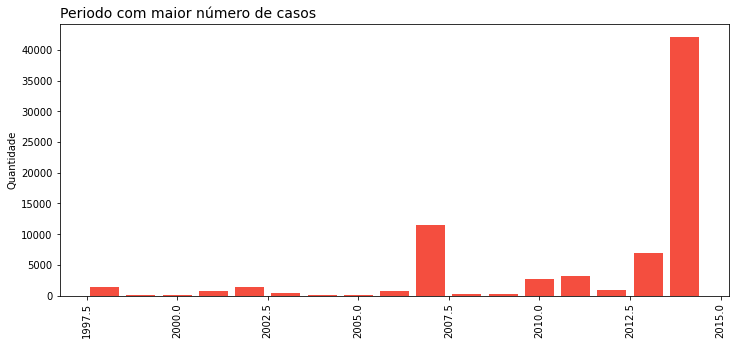

In [ ]:
# analise por caso Dengue
Analise_03 = B_Dados.groupby( by=['ano'] ).sum().reset_index()[['ano', 'casos-confirmados']].sort_values( 'casos-confirmados', ascending=False )
Analise_03.head()

# Tamanho
plt.figure( figsize=(12, 5) )

# Grafico
plt.title( 'Periodo com maior número de casos', loc='left', fontsize=14 )

# Grafico
plt.bar( Analise_03.ano, Analise_03['casos-confirmados'], color='#f44e3f' )

# Labels
plt.ylabel('Quantidade')
plt.xticks( rotation=90 );

In [ ]:
# Campos unicos

B_Dados.nunique()

data                    204
dia                       1
mês                      12
ano                      17
casos-confirmados       100
chuva                   186
temperatura-media        83
temperatura-mininima     16
temperatura-maxima       77
dtype: int64

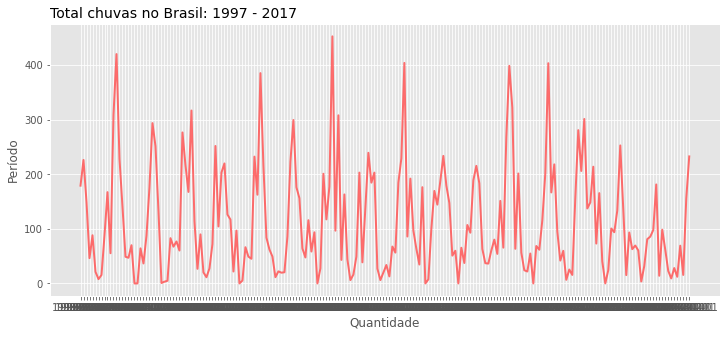

In [ ]:
# analise por data das chuvas
Analise = B_Dados.groupby( by=['data'] ).sum().reset_index()

Analise.head()

# Tamanho
plt.figure( figsize=(12, 5) )

# Style
plt.style.use('ggplot')

# Grafico
plt.title( 'Total chuvas no Brasil: 1997 - 2017', loc='left', fontsize=14 )
sns.lineplot( data=Analise, x='data', y='chuva', estimator='sum', lw=2, color='#ff5555', alpha=0.85 );

# Labels
plt.xlabel('Quantidade')
plt.ylabel('Período');

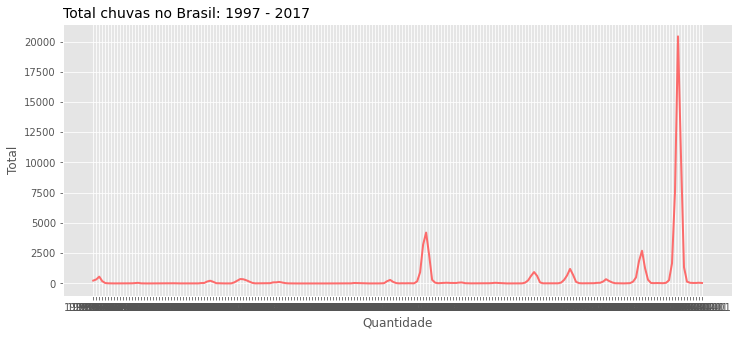

In [ ]:
# analise por data dos chuvas
Analise = B_Dados.groupby( by=['data'] ).sum().reset_index()

Analise.head()

# Tamanho
plt.figure( figsize=(12, 5) )

# Style
plt.style.use('ggplot')

# Grafico
plt.title( 'Total chuvas no Brasil: 1997 - 2017', loc='left', fontsize=14 )
sns.lineplot( data=Analise, x='data', y='casos-confirmados', estimator='sum', lw=2, color='#ff5555', alpha=0.85 );

# Labels
plt.xlabel('Quantidade')
plt.ylabel('Total');

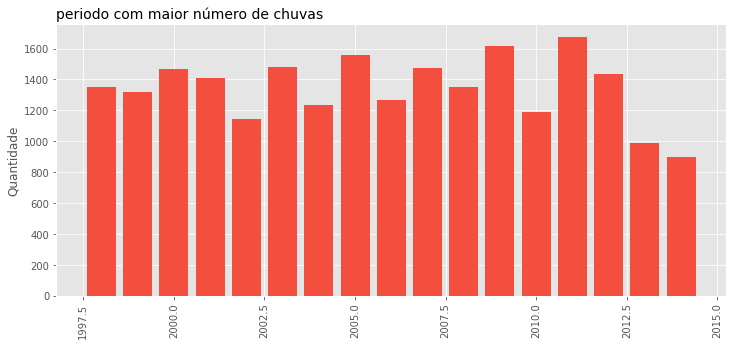

In [ ]:
# analise por ano das chuva
Analise_04 = B_Dados.groupby( by=['ano'] ).sum().reset_index()[['ano', 'chuva']].sort_values( 'chuva', ascending=False )
Analise_04.head()

# Tamanho
plt.figure( figsize=(12, 5) )

# Grafico
plt.title( 'periodo com maior número de chuvas', loc='left', fontsize=14 )

# Grafico
plt.bar( Analise_04.ano, Analise_04['chuva'], color='#f44e3f' )

# Labels
plt.ylabel('Quantidade')
plt.xticks( rotation=90 );

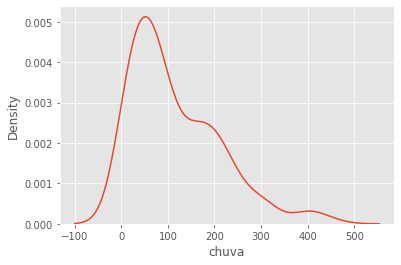

In [ ]:
#ploting the volume of rain in each month since 1998
fig1 = make_subplots(specs=[[{"secondary_y": True}]])
fig1.add_trace(go.Scatter(x = B_Dados['data'],y = B_Dados['chuva'],name = 'Chuva mm/ mês'),secondary_y = False)
fig1.add_trace(go.Bar(x = B_Dados['data'],y = B_Dados['casos-confirmados'],name = 'Casos Dengue'),secondary_y = True)
fig1.update_layout(
    yaxis = dict(
        title = 'Chuva mm'
    ),
    yaxis2 = dict(
        title  = 'Casos'
    ),
    title_text="Chuva e casos em Campinas/SP"
)
sns.kdeplot(B_Dados['chuva']);

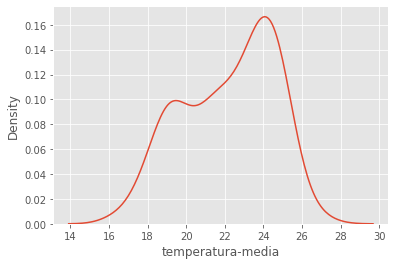

In [ ]:
#fazendo o mesmo processo com temperatura média
fig2 = make_subplots(specs=[[{"secondary_y": True}]])
fig2.add_trace(go.Scatter(x = B_Dados['data'],y = B_Dados['temperatura-media'],name = 'Temperatura média'),secondary_y = False)
fig2.add_trace(go.Bar(x = B_Dados['data'],y = B_Dados['casos-confirmados'],name = 'Casos Dengue'),secondary_y = True)
fig2.update_layout(
    yaxis = dict(
        title = 'Temperatura média C'
    ),
    yaxis2 = dict(
        title  = 'Casos'
    ),
    title_text="Temperatura média e casos em Campinas/SP"
)
sns.kdeplot(B_Dados['temperatura-media']);

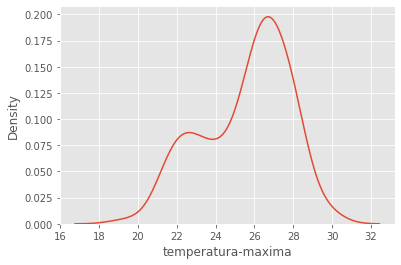

In [ ]:
#analisando temperatura máxima 
fig2 = make_subplots(specs=[[{"secondary_y": True}]])
fig2.add_trace(go.Scatter(x = B_Dados['data'],y = B_Dados['temperatura-maxima'],name = 'Temperatura méd'),secondary_y = False)
fig2.add_trace(go.Bar(x = B_Dados['data'],y = B_Dados['casos-confirmados'],name = 'Casos Dengue'),secondary_y = True)
fig2.update_layout(
    yaxis = dict(
        title = 'Temperatura máxima'
    ),
    yaxis2 = dict(
        title  = 'Casos'
    ),
    title_text="Temperatura máxima e casos em Campinas/SP"
)
sns.kdeplot(B_Dados['temperatura-maxima']);